In [2]:
#pip install string

In [3]:
#lemetization : verb into root word
#stemming : dividing into non meaning word

In [4]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
DATASET_COLUMNS=['text', 'category']
df = pd.read_csv('twitter_data\Twitter_Data.csv', names=DATASET_COLUMNS, header=0)
df.sample(5)

text  category
36095   agar aisa hota congress kabhi modi chordhti na...       1.0
87847   got confused between asatand theatre set and w...      -1.0
97221   seems hater bjp name and birth\nyou didnt seen...       0.0
156609                      first you give lacs due modi        1.0
95253     yes modi born 1959 and credit should nehru only       0.0

In [6]:
df.head()

text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [7]:
df.columns

Index(['text', 'category'], dtype='object')

In [8]:
len(df)

162980

In [9]:
df.shape

(162980, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   text      162976 non-null  object 
 1   category  162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [11]:
df.dtypes

text         object
category    float64
dtype: object

In [12]:
np.sum(df.isnull().any(axis=1))

11

In [13]:
df['text'].nunique()

162976

In [14]:
df['category'].unique()

array([-1.,  0.,  1., nan])

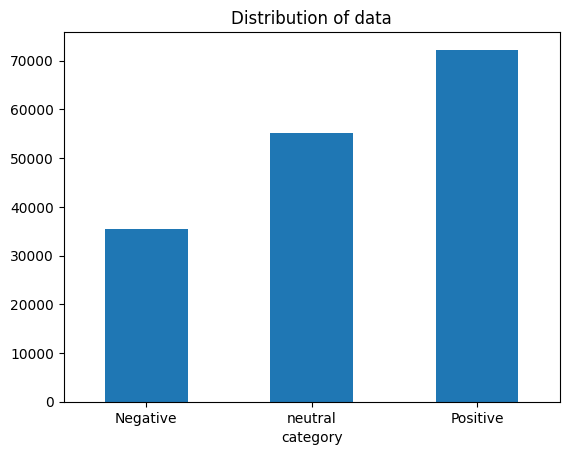

In [15]:
ax = df.groupby('category').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative', 'neutral', 'Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['category'])

<Axes: xlabel='category', ylabel='count'>

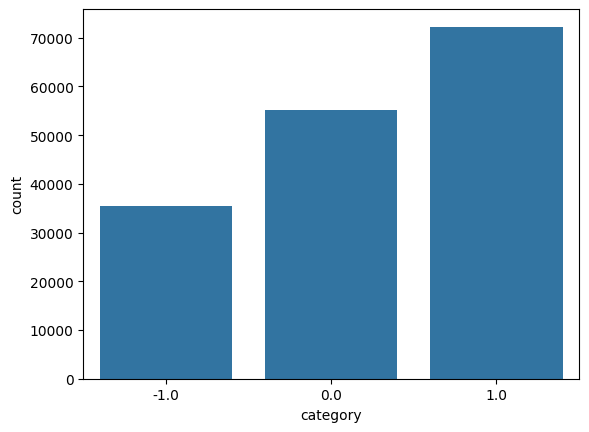

In [16]:
import seaborn as sns
sns.countplot(x='category', data=df)

In [17]:
data=df[['text','category']]

In [18]:
data['category'].unique()

array([-1.,  0.,  1., nan])

In [19]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [20]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].tail()

162975    456 crores paid neerav modi not recovered cong...
162976    dear rss terrorist payal gawar modi killing 10...
162977                         cover interaction forum left
162978    big project came india modi dream project but ...
162979    ever listen like gurukul discipline maintained...
Name: text, dtype: object

In [21]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

162975    456 crores paid neerav modi not recovered cong...
162976    dear rss terrorist payal gawar modi killing 10...
162977                         cover interaction forum left
162978    big project came india modi dream project but ...
162979    ever listen like gurukul discipline maintained...
Name: text, dtype: object

In [22]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].head()

0    modi promised “minimum government maximum gove...
1               talk nonsense continue drama vote modi
2    say vote modi welcome bjp told rahul main camp...
3    asking supporters prefix chowkidar names modi ...
4    answer among powerful world leader today trump...
Name: text, dtype: object

In [23]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

162975    456 crores paid neerav modi not recovered cong...
162976    dear rss terrorist payal gawar modi killing100...
162977                         cover interaction forum left
162978    big project came india modi dream project but ...
162979    ever listen like gurukul discipline maintained...
Name: text, dtype: object

In [24]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

162975     crores paid neerav modi not recovered congres...
162976    dear rss terrorist payal gawar modi killing pl...
162977                         cover interaction forum left
162978    big project came india modi dream project but ...
162979    ever listen like gurukul discipline maintained...
Name: text, dtype: object

In [25]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text'].head()

0    [modi, promised, minimum, government, maximum,...
1        [talk, nonsense, continue, drama, vote, modi]
2    [say, vote, modi, welcome, bjp, told, rahul, m...
3    [asking, supporters, prefix, chowkidar, names,...
4    [answer, among, powerful, world, leader, today...
Name: text, dtype: object

In [26]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0    [modi, promised, minimum, government, maximum,...
1        [talk, nonsense, continue, drama, vote, modi]
2    [say, vote, modi, welcome, bjp, told, rahul, m...
3    [asking, supporters, prefix, chowkidar, names,...
4    [answer, among, powerful, world, leader, today...
Name: text, dtype: object

In [27]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()

0    [modi, promised, minimum, government, maximum,...
1        [talk, nonsense, continue, drama, vote, modi]
2    [say, vote, modi, welcome, bjp, told, rahul, m...
3    [asking, supporters, prefix, chowkidar, names,...
4    [answer, among, powerful, world, leader, today...
Name: text, dtype: object

In [28]:
data['text'] = [' '.join(tokens) for tokens in data['text']]

In [29]:
X=data.text
y=data.category
print(X.head())
print(y.head())

0    modi promised minimum government maximum gover...
1               talk nonsense continue drama vote modi
2    say vote modi welcome bjp told rahul main camp...
3    asking supporters prefix chowkidar names modi ...
4    answer among powerful world leader today trump...
Name: text, dtype: object
0   -1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: category, dtype: float64


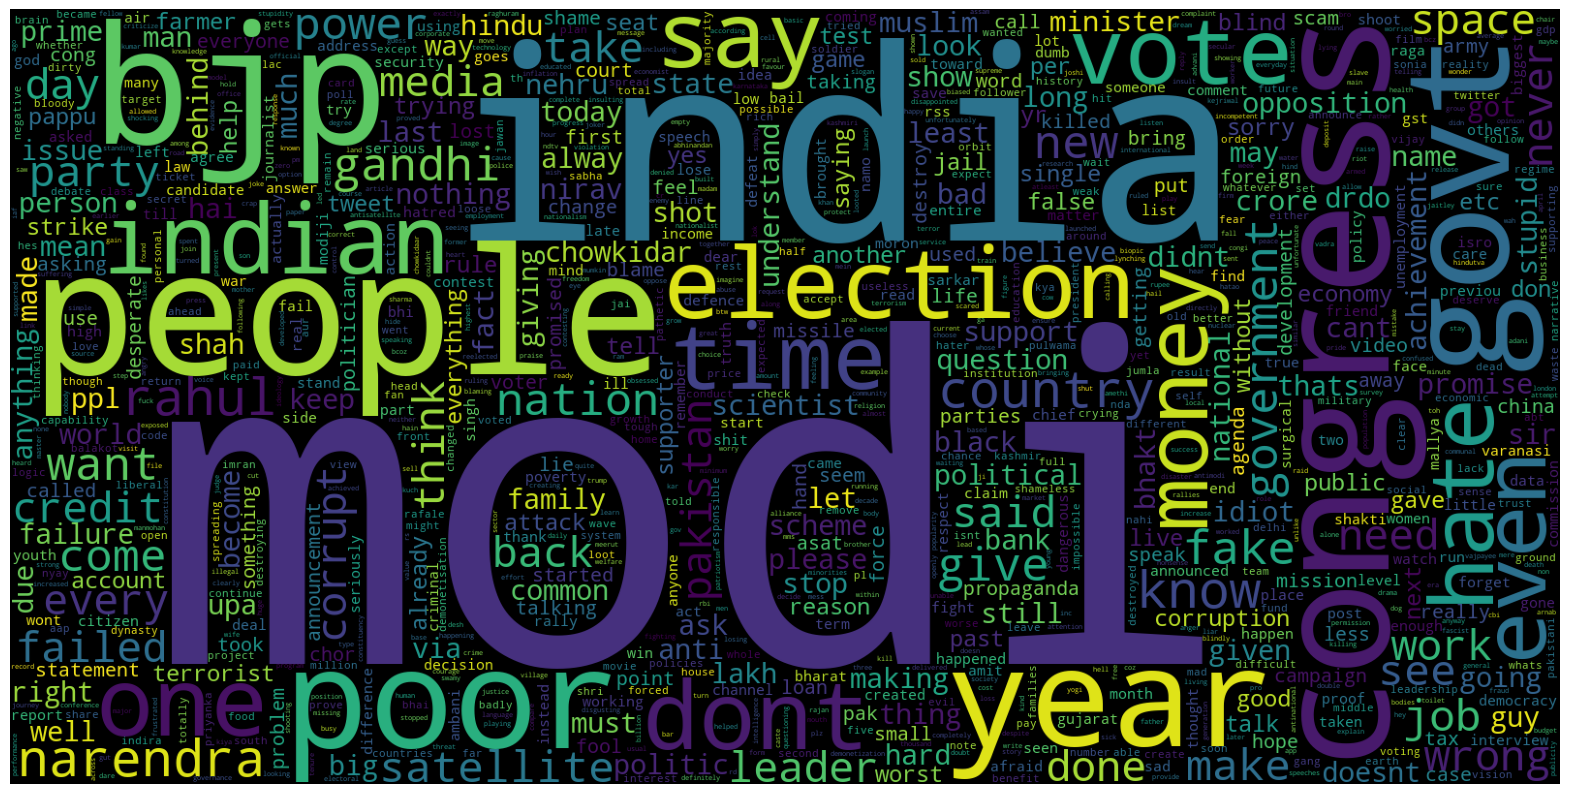

In [30]:
#will do it ltr
data_neg = data['text'][data['category']==-1]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')
plt.show()

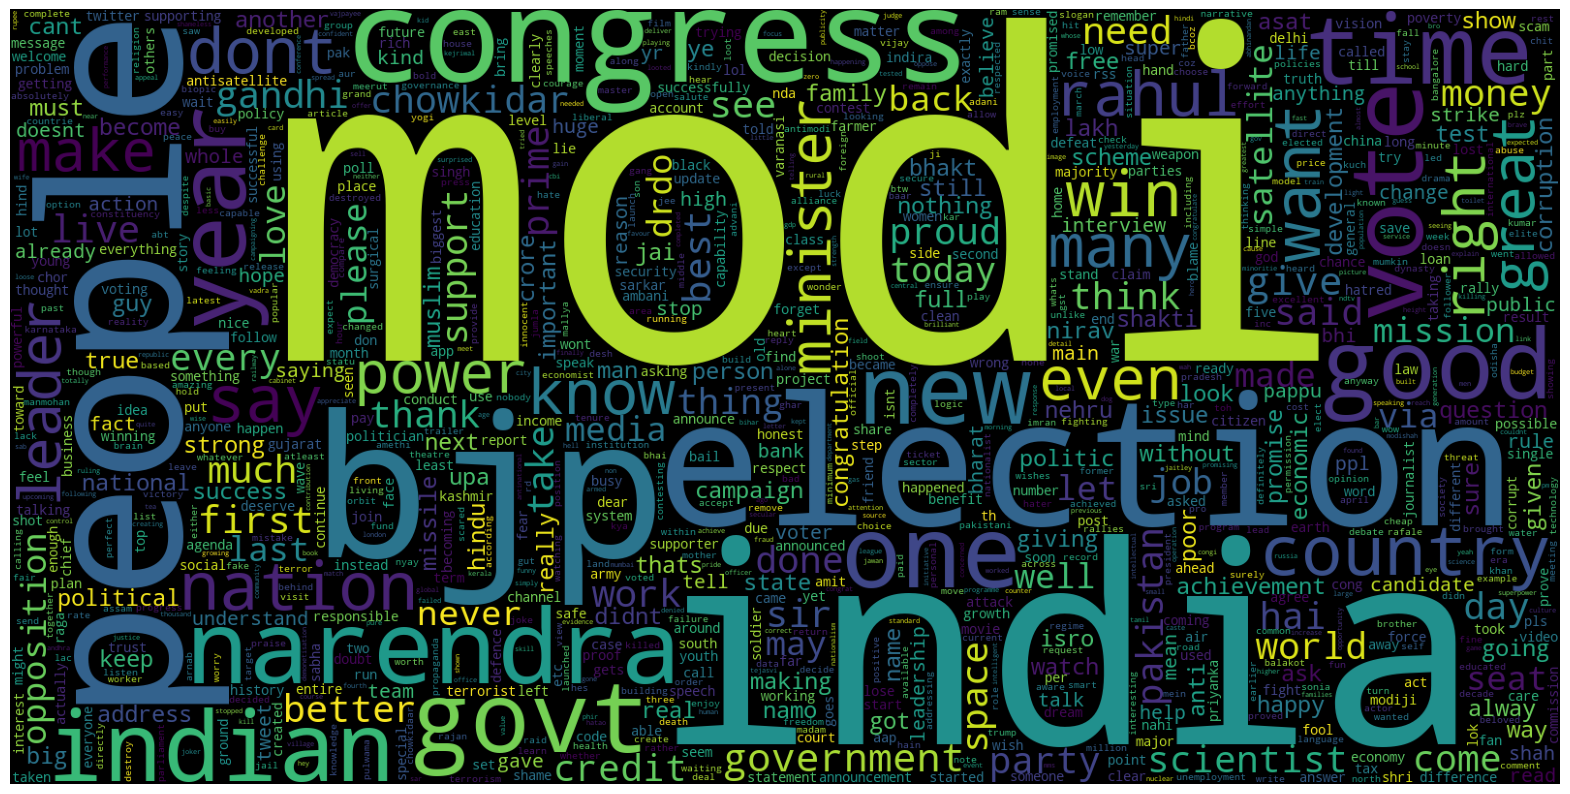

In [31]:
data_pos = data['text'][data['category']==1]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.axis('off')
plt.show()

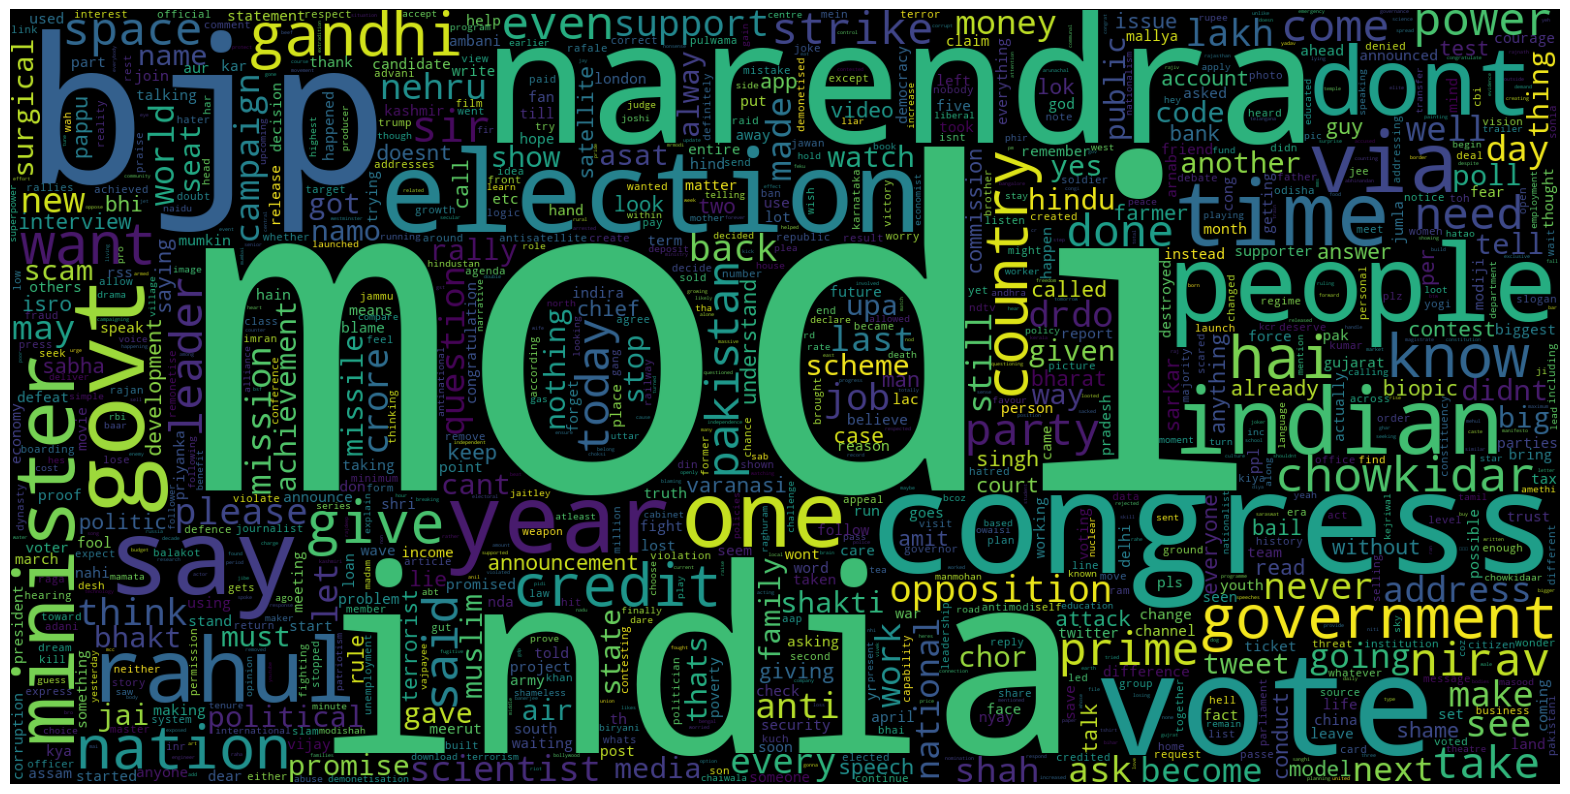

In [32]:
data_neutral = data['text'][data['category']==0]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neutral))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [33]:
data = data.dropna()
X = data.text
y = data.category

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [35]:
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words:', len(vectoriser.get_feature_names_out()))

No. of feature_words: 500000


In [36]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
def model_Evaluate(model, categories):
    # Predict values using the model
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate group percentages
    group_percentages = [f'{value:.2%}' for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    # Define group names based on the shape of the confusion matrix
    num_classes = cf_matrix.shape[0]
    
    if num_classes == 2:
        group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    else:
        group_names = [f'Class {i}' for i in range(num_classes**2)]

    # Create labels for the heatmap
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(cf_matrix.shape)

    # Plot confusion matrix
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print(classification_report(y_test, y_pred))


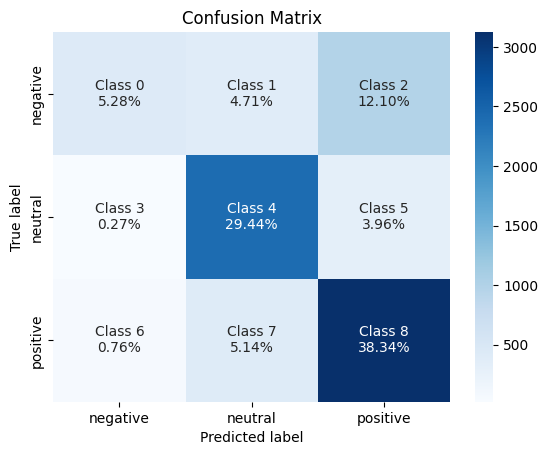

              precision    recall  f1-score   support

        -1.0       0.84      0.24      0.37      1800
         0.0       0.75      0.87      0.81      2744
         1.0       0.70      0.87      0.78      3605

    accuracy                           0.73      8149
   macro avg       0.76      0.66      0.65      8149
weighted avg       0.75      0.73      0.70      8149



In [38]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
categories = ['negative', 'neutral', 'positive']
model_Evaluate(BNBmodel, categories)
y_pred = BNBmodel.predict(X_test)

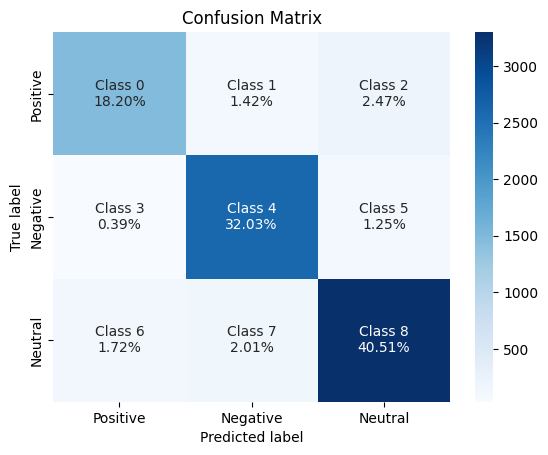

              precision    recall  f1-score   support

        -1.0       0.90      0.82      0.86      1800
         0.0       0.90      0.95      0.93      2744
         1.0       0.92      0.92      0.92      3605

    accuracy                           0.91      8149
   macro avg       0.91      0.90      0.90      8149
weighted avg       0.91      0.91      0.91      8149



In [42]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel, categories=['Positive', 'Negative', 'Neutral'])
y_pred2 = SVCmodel.predict(X_test)

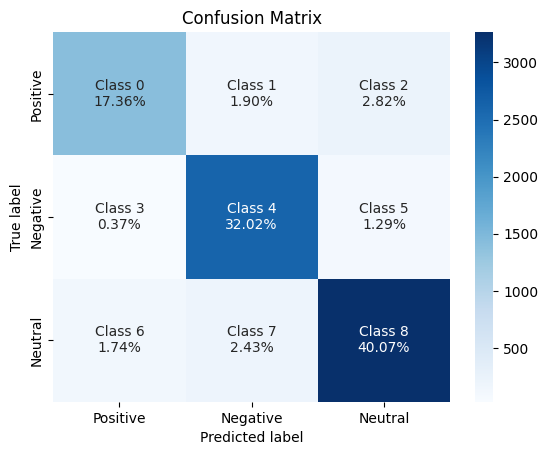

              precision    recall  f1-score   support

        -1.0       0.89      0.79      0.84      1800
         0.0       0.88      0.95      0.91      2744
         1.0       0.91      0.91      0.91      3605

    accuracy                           0.89      8149
   macro avg       0.89      0.88      0.89      8149
weighted avg       0.89      0.89      0.89      8149



In [48]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel, categories=['Positive', 'Negative', 'Neutral'])
y_pred3 = LRmodel.predict(X_test)